In [3]:
import pandas as pd
import numpy as np
import glob
import cv2
import PIL
from PIL import ImageGrab
import matplotlib.pyplot as plt

In [19]:
data = pd.read_excel('units_location.xlsx')

In [125]:
path_to_files = glob.glob('./Screens/*.png')
image = cv2.imread(path_to_files[-1])

image = PIL.Image.open(path_to_files[0])

In [90]:
y_top, y_bot

([414, 595, 780, 960, 1142, 1324, 1504, 1684],
 [423, 604, 789, 969, 1151, 1333, 1513, 1693])

In [40]:
image = np.array(image)

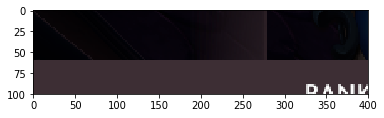

In [12]:
plt.imshow(image1[200:300, :400])

In [22]:
px_prev = image[265, 0:][0]
x_arr = []
for i, px in enumerate(image[265, 0:]):
    if np.linalg.norm(px-px_prev) == 0:
        continue
    px_prev = px
    x_arr.append(i)
x_arr=x_arr[:7]

In [23]:
x_start, x_end = x_arr[2], x_arr[3]-1

In [88]:
# y_top = list(data[(data['Unnamed: 0'].str.contains('top')) & (data.index <= 15)]['Unnamed: 1'].astype(int)+5)
y_bot = list(data[(data['Unnamed: 0'].str.contains('bot')) & (data.index <= 15)]['Unnamed: 1'].astype(int)-15)
y_top = list(data[(data['Unnamed: 0'].str.contains('bot')) & (data.index <= 15)]['Unnamed: 1'].astype(int)-24)

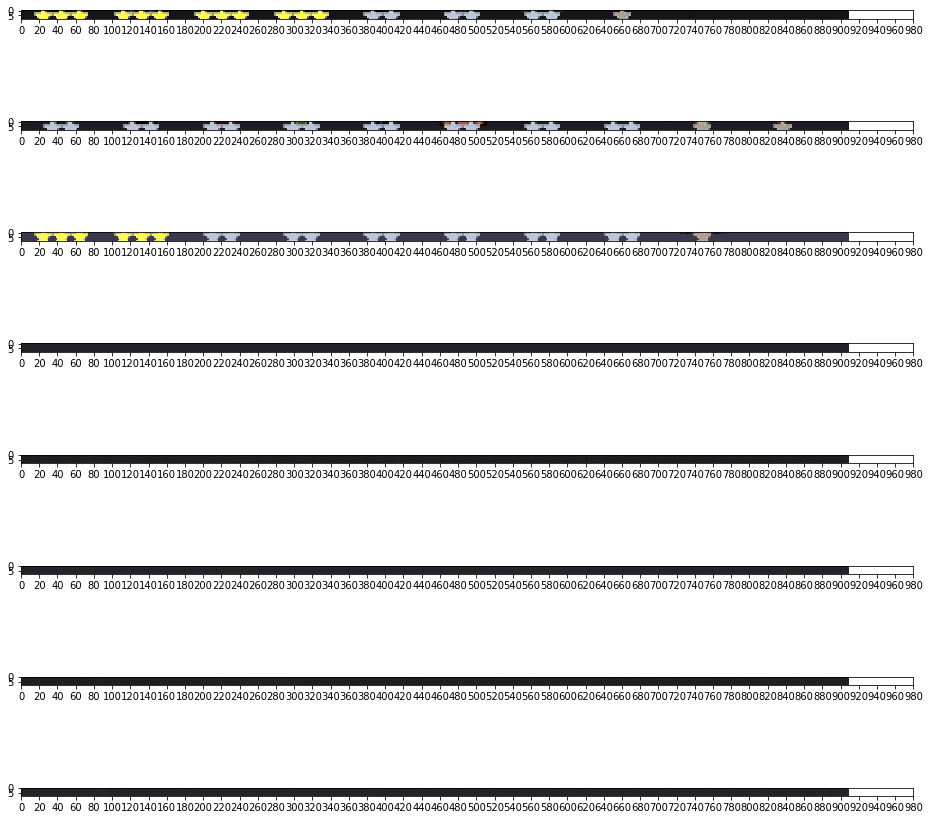

In [89]:
fig, ax = plt.subplots(8,1,figsize=(16,16))
i=0
roamster = []
for y1, y2 in zip(y_top, y_bot):
    ax[i].imshow(image[y1:y2, x_start:x_end])
    ax[i].set_xticks(range(0, 1000, 20))
    roamster.append(image[y1:y2, x_start:x_end])
    i+=1


In [127]:
step = 3
# for roam in roamster:
roam = roamster[0]
px_prev = np.array(roam[:, 0:step], dtype='int')
lengths = []
start = None
end = None
for px in range(step, roam.shape[1], step):
    i = px
    px = np.array(roam[:, px:px+step], dtype='int')
#         print(i, np.linalg.norm(px_prev - px))
    if np.linalg.norm(px_prev - px) > 20:
        print(i, np.linalg.norm(px_prev - px))
        if not start:
            start = i
    else:
        if start:
            print(i, start)
            lengths.append(i-start)
            start = None
#     px_prev = px
            

12 424.7693491767032
15 949.0642760108506
18 1356.2230642486509
21 1576.1227744055982
24 1595.8671623916573
27 1445.3276445152496
30 1060.676670809724
33 811.9599743829741
36 1137.3425165709757
39 1401.9586299174453
42 1636.2664819643528
45 1556.8814983806571
48 1317.9472675338723
51 1004.6427225635987
54 849.2161091265285
57 1225.8727503293317
60 1512.2678334210511
63 1635.0425070927056
66 1481.623771407573
69 1220.1225348300063
72 770.7995848468005
75 12
102 849.1042338841563
105 1225.8735660744137
108 1512.5633871015125
111 1635.0425070927056
114 1480.7815503983024
117 1223.5456673128306
120 914.5069709958476
123 957.949372357433
126 1359.5705204217984
129 1579.9398722736255
132 1600.094372216839
135 1449.8730978951228
138 1068.2143979557661
141 850.6468127254695
144 1140.383707354678
147 1402.5273615869316
150 1636.2664819643528
153 1556.9919717198288
156 1317.1248991648438
159 1003.8605480842447
162 102
189 599.8383115473703
192 1136.6912509560368
195 1401.6215609072228
198 1636.2

In [145]:
%%timeit
roam = roamster[0]
px_prev = np.array(roam[:, 0:step], dtype='int')
lengths = []
start = None
end = None
roam1 = []
for px in range(roam.shape[1]):
    roam1.append(np.linalg.norm(roam[:, px]))
    
roam1 = [1 if x > roam1[0] * 1.2 else 0 for x in roam1]
start = None
for i, px in enumerate(roam1):
    if px == 0:
        if start:
            print(i-start)
            start = None
    else:
        if not start:
            start = i

60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
4

60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
4

60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
40
44
20
60
60
60
60
40
4

60
60
60
60
40
40
40
20


In [7]:
roll_probs = {
    1 : {
        1 : 1,
        2 : 0,
        3 : 0,
        4 : 0,
        5 : 0
    },
    2 : {
        1 : 0.7,
        2 : 0.3,
        3 : 0,
        4 : 0,
        5 : 0
    },
    3 : {
        1 : 0.6,
        2 : 0.35,
        3 : 0.05,
        4 : 0,
        5 : 0
    },
    4 : {
        1 : 0.5,
        2 : 0.35,
        3 : 0.15,
        4 : 0,
        5 : 0
    },
    5 : {
        1 : 0.4,
        2 : 0.35,
        3 : 0.25,
        4 : 0,
        5 : 0
    },
    6 : {
        1 : 0.3,
        2 : 0.3,
        3 : 0.3,
        4 : 0.1,
        5 : 0
    },
    7 : {
        1 : 0.25,
        2 : 0.3,
        3 : 0.3,
        4 : 0.15,
        5 : 0
    },
    8 : {
        1 : 0.22,
        2 : 0.27,
        3 : 0.3,
        4 : 0.2,
        5 : 0.01
    },
    9 : {
        1 : 0.2,
        2 : 0.23,
        3 : 0.29,
        4 : 0.25,
        5 : 0.03
    },
    10 : {
        1 : 0.15,
        2 : 0.21,
        3 : 0.28,
        4 : 0.3,
        5 : 0.06
    },
    11 : {
        1 : 0.15,
        2 : 0.2,
        3 : 0.25,
        4 : 0.3,
        5 : 0.1
    }
}

In [8]:
hero_pool = {
    1 : 45,
    2 : 30,
    3 : 25,
    4 : 20,
    5 : 10
}

In [163]:
heroes = {
    1 : ['AntiMage', 'Axe', 'Batrider', 'Bloodseeker', 
         'BountyHunter', 'DrowRanger', 'Enchantress', 
         'OgreMagi', 'Razor', 'ShadowShaman', 'Tiny', 
         'Tusk', 'Venomancer', 'Warlock'],
    2 : ['Beastmaster', 'ChaosKnight', 'Juggernaut', 
         'Lina', 'Luna ', 'Morphling', 'NaturesProphet ', 
         'Puck', 'Pudge', 'QueenOfPain ', 'Slardar', 
         'Timbersaw', 'Windranger', 'Witchdoctor'],
    3 : ['Abaddon', 'Tinker', 'CrystalMaiden', 'Lycan', 
         'Omniknight', 'TreantProtector ', 'Clockwerk ', 
         'PhantomAssassin', 'ShadowFiend', 'Slark', 
         'Sniper', 'Terrorblade', 'Viper'],
    4 : ['Alchemist', 'Doom', 'SandKing', 'ArcWarden', 
         'DragonKnight', 'KeeperOfTheLight', 
         'Kunkka', 'LoneDruid', 'Mirana', 'Necrophos', 
         'TemplarAssassin', 'Tidehunter'],
    5 : ['Disruptor', 'Enigma', 'Gyrocopter', 'Lich', 
         'Medusa', 'Techies', 'TrollWarlord']
}

In [165]:
a = 0
for z in heroes:
    a+=len(heroes[z])
    print(len(heroes[z]))
print(a)

14
14
13
12
7
60


In [130]:
class Hero():
    def __init__(self, name, star):
        self.star = star
        self.name = name
        self.pool = hero_pool[self.star]
        self.mine = 0
        self.left = 9
        
    def update(self, on_hands, me):
        self.pool = hero_pool[self.star] - on_hands
        self.mine = me
        self.left = 9 - self.mine
        
    def set_expected(self, value):
        self.value = value
        
        
        
class GameManager():
    def __init__(self):
        self.level = 1
        self.probs = roll_probs
        self.curr_probs = self.probs[self.level]
        
        
    def get_pic(self):
#         self.pic = ImageGrab.grab()[:, :, [2,1,0]]
        self.pic = np.array(PIL.Image.open(path_to_files[0]))[:, :, :3]
        self.x_roaster, self.x_bench = self.get_x_sizes()
        self.y_roaster = ([355, 536, 721, 901, 1083, 1265, 1445, 1625],
                          [408, 589, 774, 954, 1136, 1318, 1498, 1678])
        
        self.y_roaster_stars = ([414, 595, 780, 960, 1142, 1324, 1504, 1684],
                                [423, 604, 789, 969, 1151, 1333, 1513, 1693])
        
        self.roasters = [self.pic[self.y_roaster[0][i]:self.y_roaster[1][i], 
                                  self.x_roaster[0]:self.x_roaster[1]] for i in range(8)]
        self.roasters_stars = [self.pic[self.y_roaster_stars[0][i]:self.y_roaster_stars[1][i], 
                                  self.x_roaster[0]:self.x_roaster[1]] for i in range(8)]
        
        self.define_stars()
        
    def get_x_sizes(self):
        px_prev = self.pic[265, 0:][0]
        x_arr = []
        for i, px in enumerate(self.pic[265, 0:]):
            if np.linalg.norm(px-px_prev) == 0:
                continue
            px_prev = px
            x_arr.append(i)
        x_arr=x_arr[:7]
        return (x_arr[2], x_arr[3]-1), (x_arr[5], x_arr[6]-1)
    
    def define_stars(self):
        self.stars = [[],[],[],[],[],[],[],[]]
        for n, roam in enumerate(self.roasters_stars):
            px_prev = roam[:, 0:3]
            start = None
            roam1 = []
            for px in range(roam.shape[1]):
                roam1.append(np.linalg.norm(roam[:, px]))
#             print(roam1)
            roam1 = [1 if x > roam1[0] * 1.2 else 0 for x in roam1]
            start = None
            for i, px in enumerate(roam1):
                if px == 0:
                    if start:
                        self.stars[n].append(self.__count_units(i-start))
                        start = None
                else:
                    if not start:
                        start = i
                        
    def __count_units(self, length):
        if length > 50:
            return 9
        elif length > 30:
            return 3
        else:
            return 1

In [131]:
# %%timeit
m = GameManager()
m.get_pic()

In [132]:
m.stars

[[3, 3, 3, 3, 3, 3, 3, 3, 1, 1],
 [9, 9, 9, 3, 3, 3, 3, 1],
 [9, 9, 9, 3, 3, 3, 3, 3, 3],
 [9, 9, 9, 3, 3, 3, 3, 3],
 [9, 9, 3, 3, 3, 3, 3, 3, 1, 1],
 [],
 [],
 []]

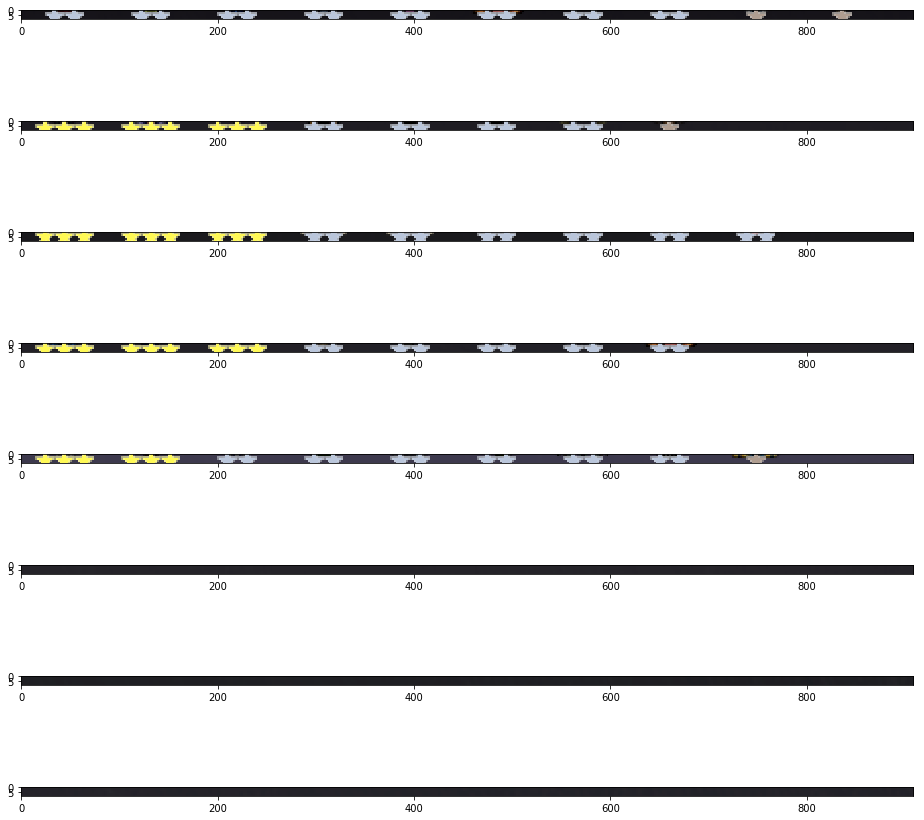

In [129]:
fig, ax = plt.subplots(8,1,figsize=(16,16))
i=0
roamster = []
for im in m.roasters_stars:
    ax[i].imshow(im)
    i+=1